In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\sowmy\\OneDrive\\Desktop\\folder\\scraped comments - Sheet2.csv')

# Display the first few rows of the dataframe
df.head()

,Name,Comment,Time,Likes,Reply Count
0,@jec_ecart,No!,2024-07-03T02:58:26Z,0,0
1,@darrenbrians5930,If we made everything electric. We&#39;d run o...,2024-06-28T11:39:10Z,1,0
2,@psychiatry-is-eugenics,Have to include all the fires - ships sinking ...,2024-06-24T20:03:04Z,0,0
3,@LanxPenzenpepper,They keep on pushing this going green stuff on...,2024-06-22T10:44:05Z,0,0
4,@PoyotaTrius,Higher airparticles from tires and brakes? Man...,2024-06-18T06:41:16Z,0,0


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values (if any)
# [Add code here if necessary]

# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Remove duplicates (if any)
# [Add code here if necessary]

# Additional cleaning steps (if required)
# [Add code here if necessary]
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Name           0
Comment        0
Time           0
Likes          0
Reply Count    0
dtype: int64


In [4]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [5]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
df.info()

# Display the first few rows of the dataframe
print("\nFirst Few Rows of the Dataset:")
df.head()

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         180 non-null    object
 1   Comment      180 non-null    object
 2   Time         180 non-null    object
 3   Likes        180 non-null    int64 
 4   Reply Count  180 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.2+ KB

First Few Rows of the Dataset:


,Name,Comment,Time,Likes,Reply Count
0,@jec_ecart,No!,2024-07-03T02:58:26Z,0,0
1,@darrenbrians5930,If we made everything electric. We&#39;d run o...,2024-06-28T11:39:10Z,1,0
2,@psychiatry-is-eugenics,Have to include all the fires - ships sinking ...,2024-06-24T20:03:04Z,0,0
3,@LanxPenzenpepper,They keep on pushing this going green stuff on...,2024-06-22T10:44:05Z,0,0
4,@PoyotaTrius,Higher airparticles from tires and brakes? Man...,2024-06-18T06:41:16Z,0,0


In [6]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
df.describe()

Summary Statistics for Numerical Columns:


,Likes,Reply Count
count,180.000000,180.000000
mean,4.944444,1.166667
std,25.300589,3.627179
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,320.000000,35.000000


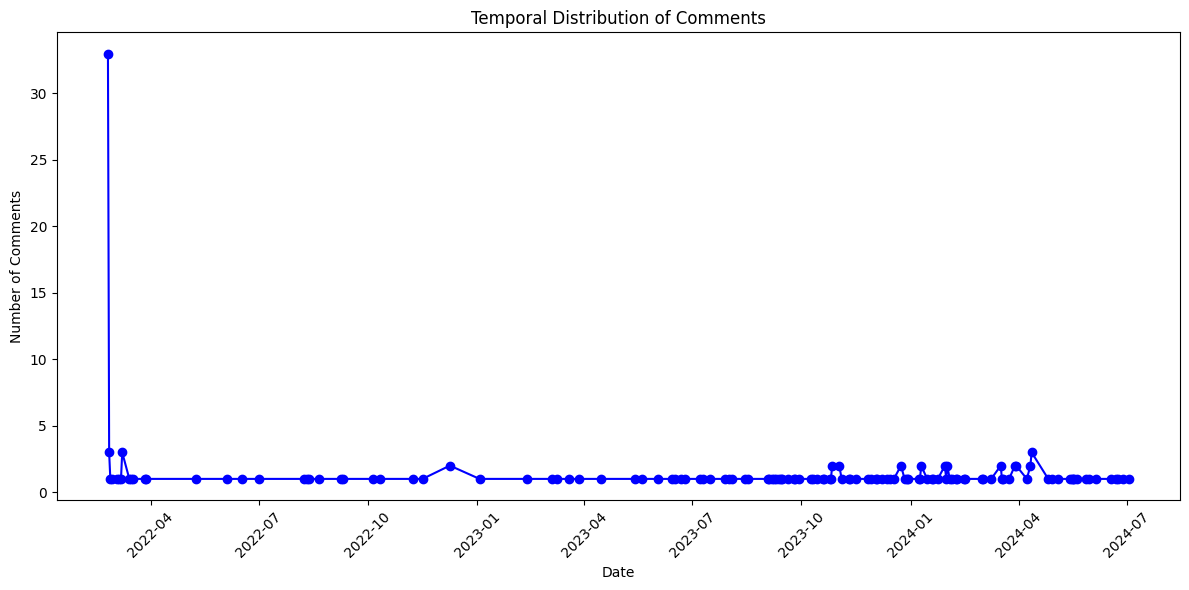

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Published At' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Create a timeline plot for comments
plt.figure(figsize=(12, 6))
df['Time'].dt.date.value_counts().sort_index().plot(kind='line', color='blue', marker='o')
plt.title('Temporal Distribution of Comments')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Create a summary table of the number of comments per date
comment_distribution = df['Time'].dt.date.value_counts().sort_index()
print("Number of Comments per Date:")
print(comment_distribution)

Number of Comments per Date:
Time
2022-02-24    33
2022-02-25     3
2022-02-26     1
2022-02-27     1
2022-03-04     1
              ..
2024-06-18     1
2024-06-22     1
2024-06-24     1
2024-06-28     1
2024-07-03     1
Name: count, Length: 131, dtype: int64


In [9]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to each comment
df['Sentiment'] = df['Comment'].apply(calculate_sentiment)

# Display the first few rows with sentiment scores
df[['Comment', 'Sentiment']].head()

ModuleNotFoundError: No module named 'textblob'

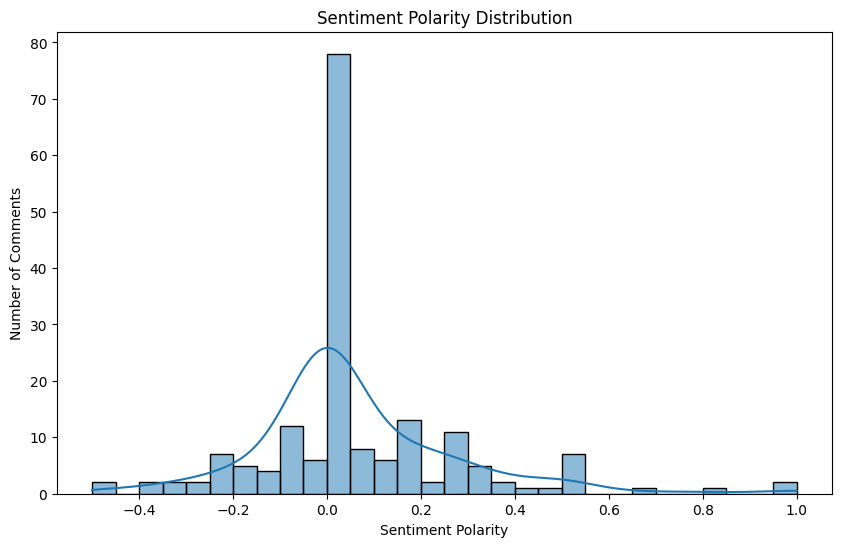

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Comments')
plt.show()


In [ ]:
#Summary Table
# Define sentiment categories
def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiments
df['Sentiment Category'] = df['Sentiment'].apply(sentiment_category)

# Create a summary table for sentiment distribution
sentiment_summary = df['Sentiment Category'].value_counts()
print("Sentiment Distribution Summary:")
print(sentiment_summary)

Sentiment Distribution Summary:
Sentiment Category
Positive    73
Neutral     65
Negative    42
Name: count, dtype: int64


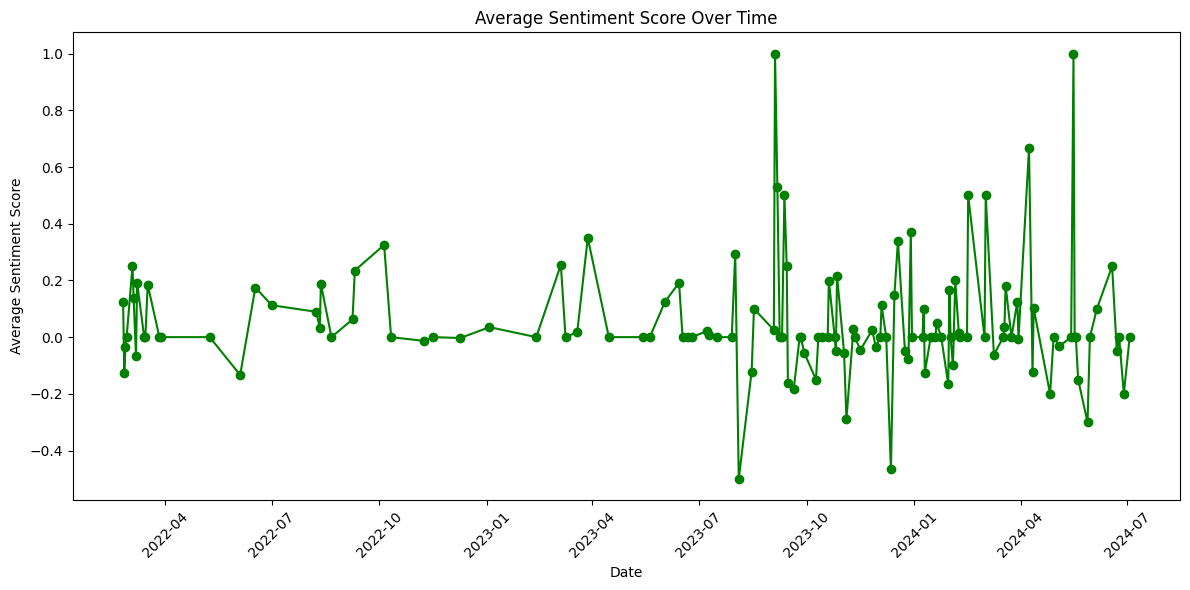

In [ ]:
# Group by date and calculate average sentiment
average_sentiment_per_day = df.groupby(df['Time'].dt.date)['Sentiment'].mean()

# Create a plot for average sentiment over time
plt.figure(figsize=(12, 6))
average_sentiment_per_day.plot(kind='line', color='green', marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Summary Table
# Convert the series to a DataFrame for better display
average_sentiment_per_day_df = average_sentiment_per_day.reset_index()
average_sentiment_per_day_df.columns = ['Date', 'Average Sentiment Score']

# Print the summary table
print("Average Sentiment Score Per Day:")
print(average_sentiment_per_day_df)

Average Sentiment Score Per Day:
           Date  Average Sentiment Score
0    2022-02-24                 0.122594
1    2022-02-25                -0.125000
2    2022-02-26                -0.033333
3    2022-02-27                 0.000000
4    2022-03-04                 0.250000
..          ...                      ...
126  2024-06-18                 0.250000
127  2024-06-22                -0.050000
128  2024-06-24                 0.000000
129  2024-06-28                -0.200000
130  2024-07-03                 0.000000

[131 rows x 2 columns]


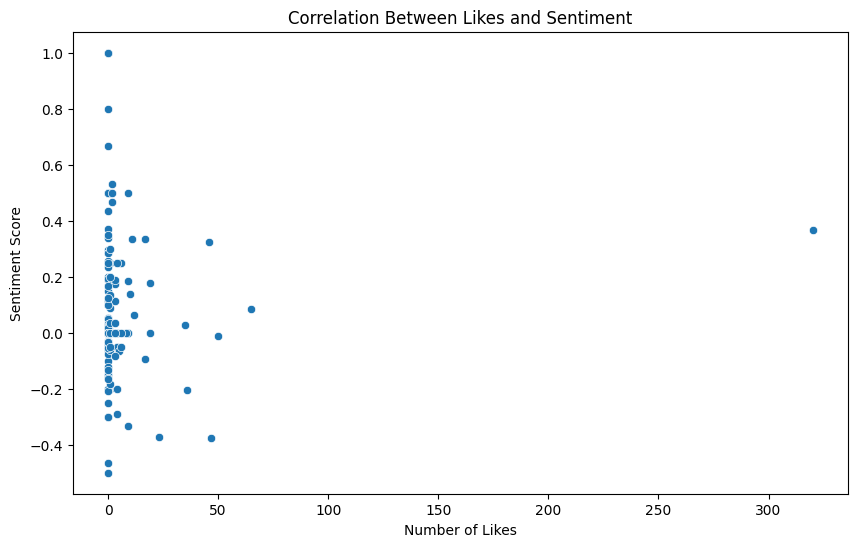

Correlation coefficient between Likes and Sentiment: 0.07283711930558627


In [ ]:
import seaborn as sns

# Scatter plot for likes vs sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Sentiment', data=df)
plt.title('Correlation Between Likes and Sentiment')
plt.xlabel('Number of Likes')
plt.ylabel('Sentiment Score')
plt.show()

# Calculating the correlation coefficient
correlation = df['Likes'].corr(df['Sentiment'])
print("Correlation coefficient between Likes and Sentiment:", correlation)

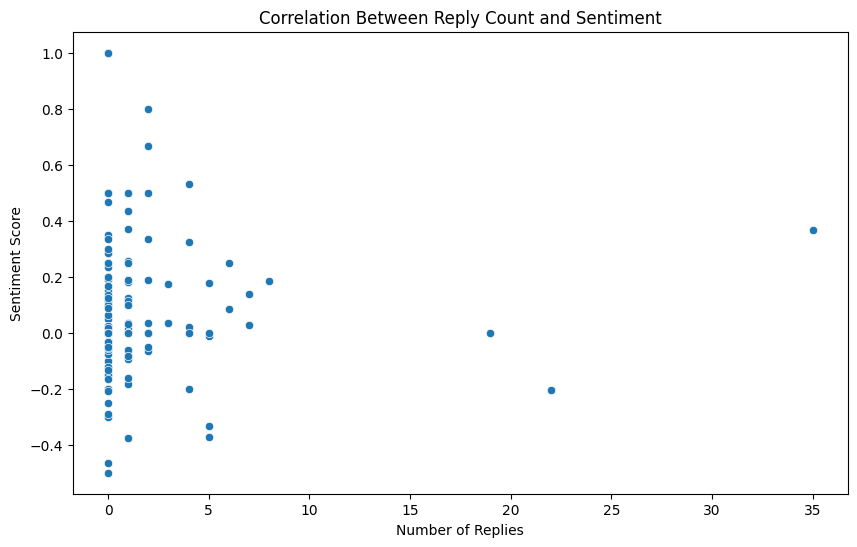

Correlation coefficient between Reply Count and Sentiment: 0.04956953125206996


In [ ]:
# Scatter plot for reply count vs sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reply Count', y='Sentiment', data=df)
plt.title('Correlation Between Reply Count and Sentiment')
plt.xlabel('Number of Replies')
plt.ylabel('Sentiment Score')
plt.show()

# Calculating the correlation coefficient
correlation_reply_sentiment = df['Reply Count'].corr(df['Sentiment'])
print("Correlation coefficient between Reply Count and Sentiment:", correlation_reply_sentiment)

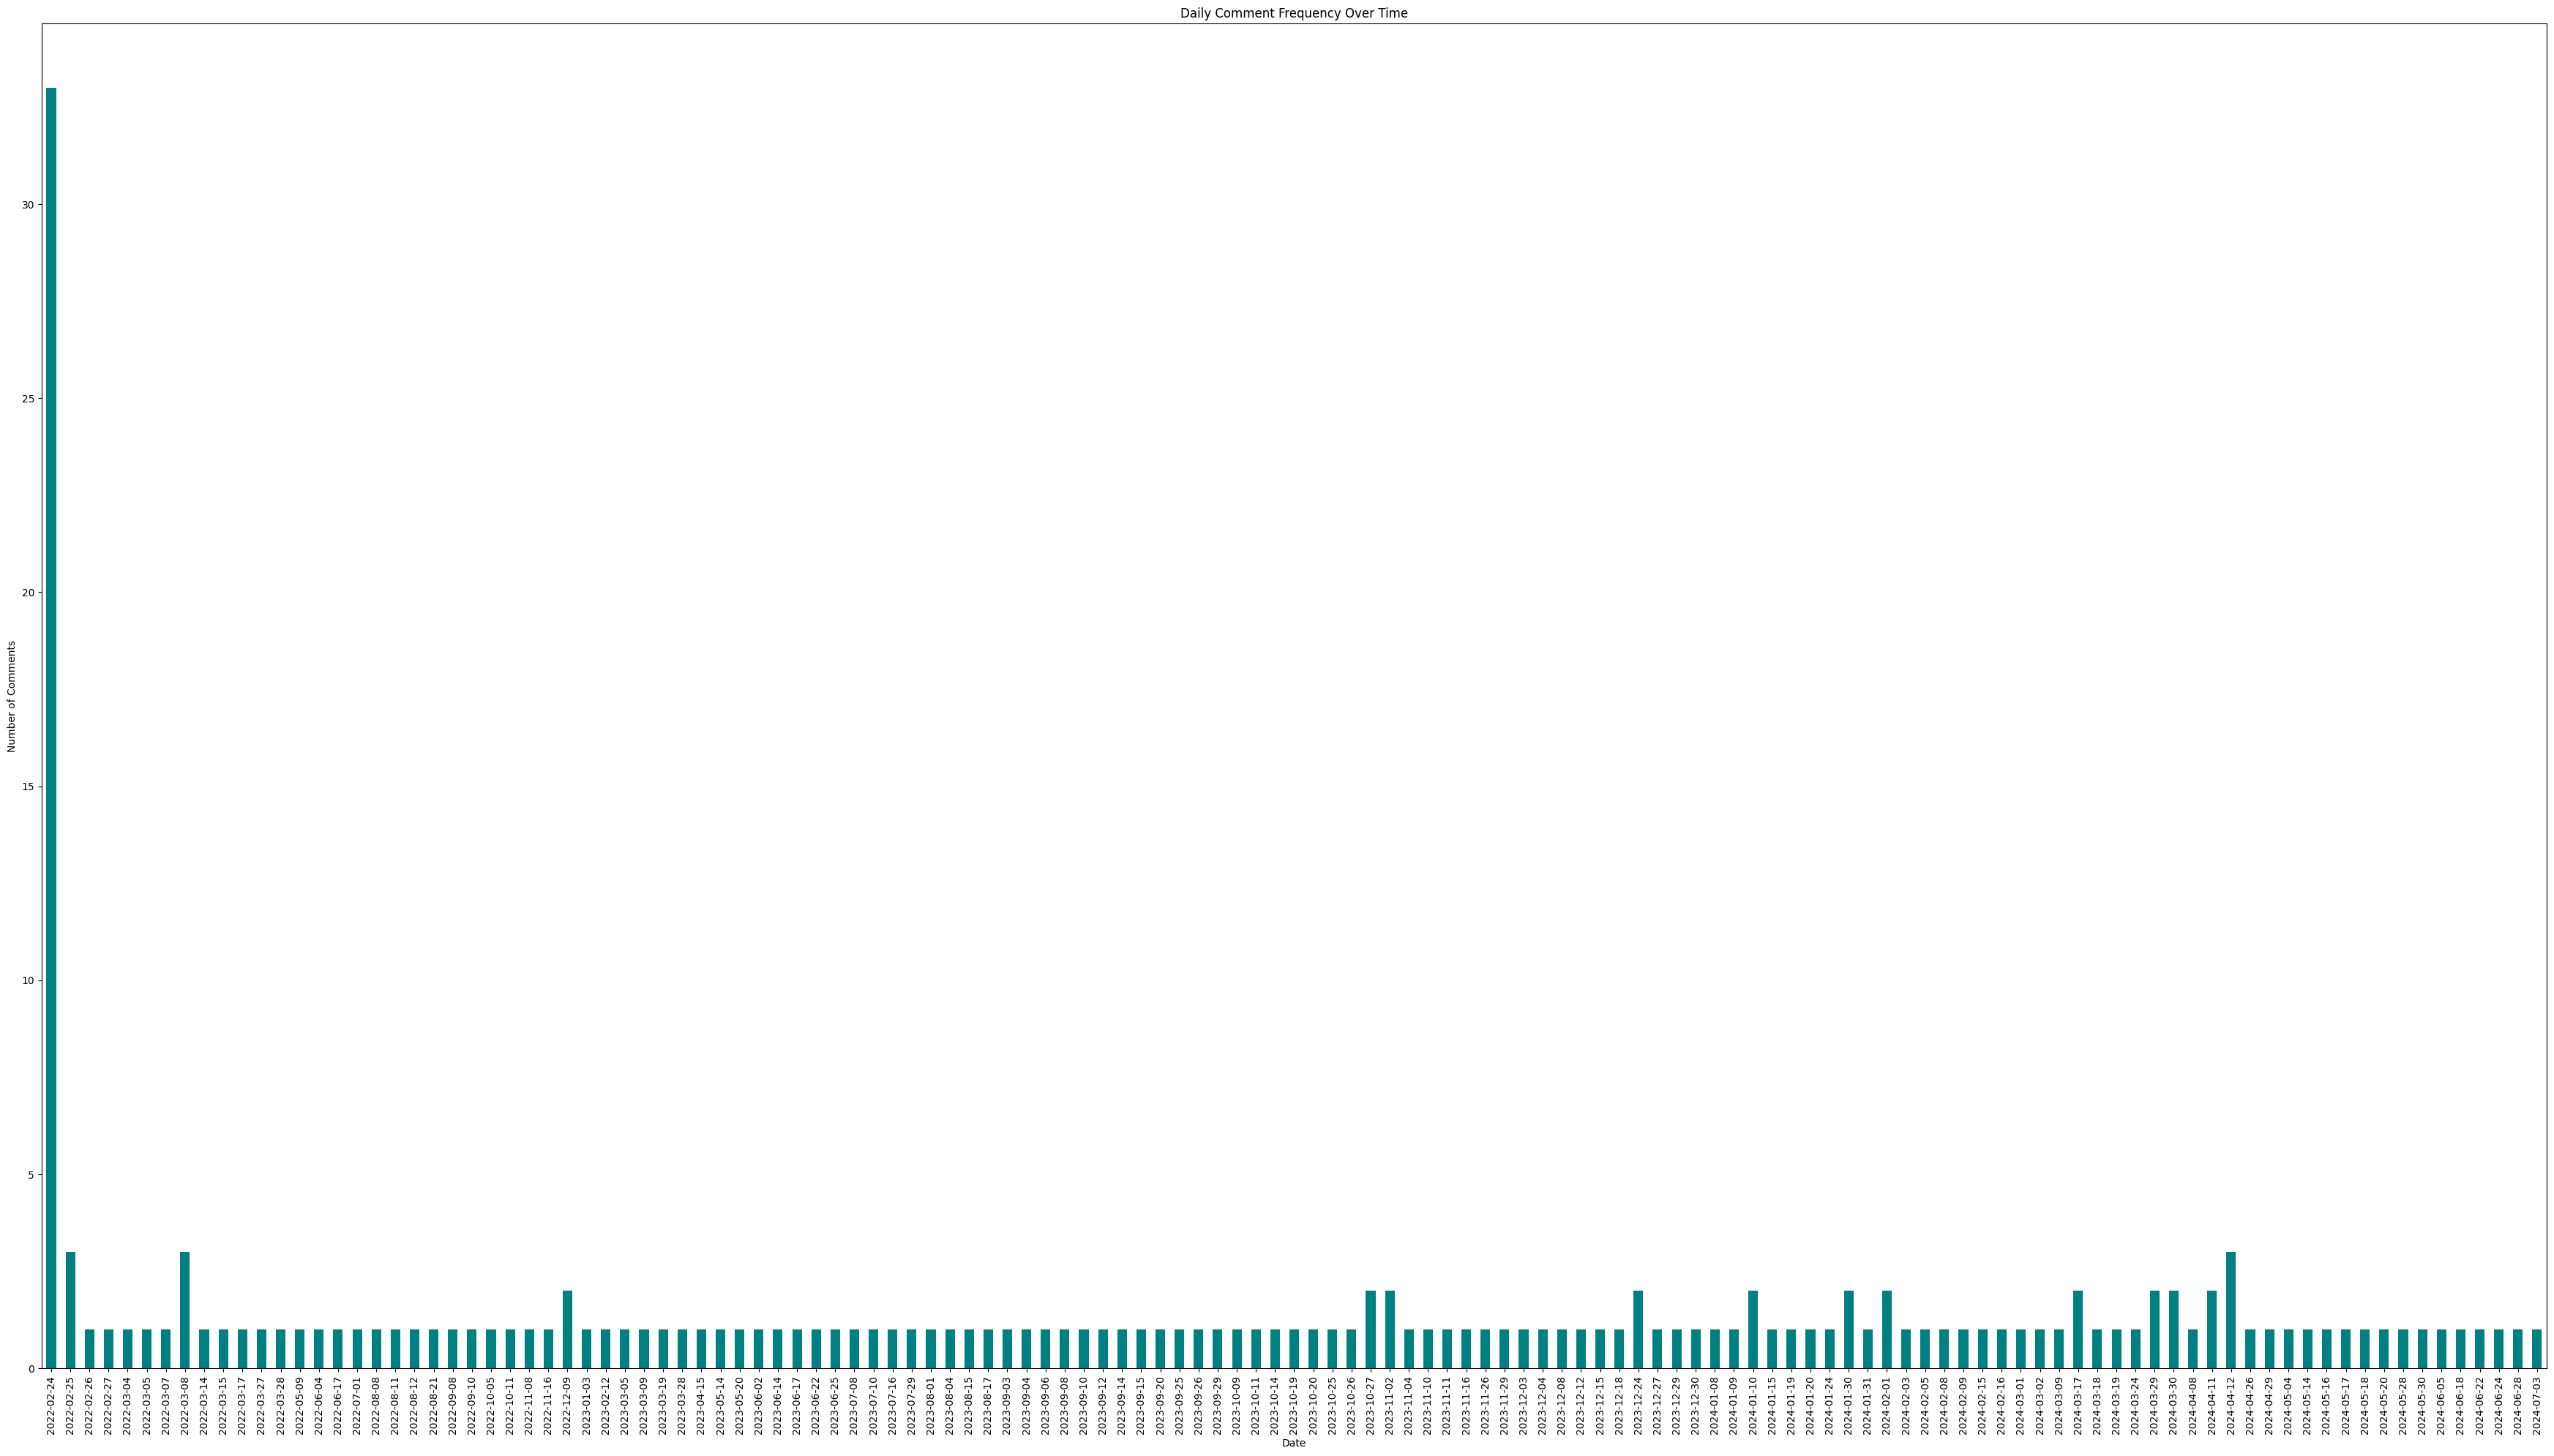

In [ ]:
# Create a bar chart for the number of comments per day
plt.figure(figsize=(35, 20))
df['Time'].dt.date.value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Daily Comment Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()